In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

pd.set_option("display.max_columns", None)

In [ ]:
data = pd.read_csv("/content/petrol_consumption.csv")

In [ ]:
df = data.copy()

In [ ]:
df.head()

,petroltax,income,pavedhighways,driverlicense,petrol_consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


# independent and dependent feature

In [ ]:
x = df.drop("petrol_consumption",axis = 1)
y = df["petrol_consumption"]

# train test split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

# Decision tree regressor

# postpruning

In [ ]:
Decision_tree = DecisionTreeRegressor()

In [90]:



params_grid = {
               "max_depth":[1,2,3,4,5,6,7,8,9,10],
}

In [91]:
grid_Decision_tree = GridSearchCV(Decision_tree,param_grid=params_grid,cv=5)

In [92]:
grid_Decision_tree.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(max_depth=5),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [93]:
grid_Decision_tree.best_params_

{'max_depth': 2}

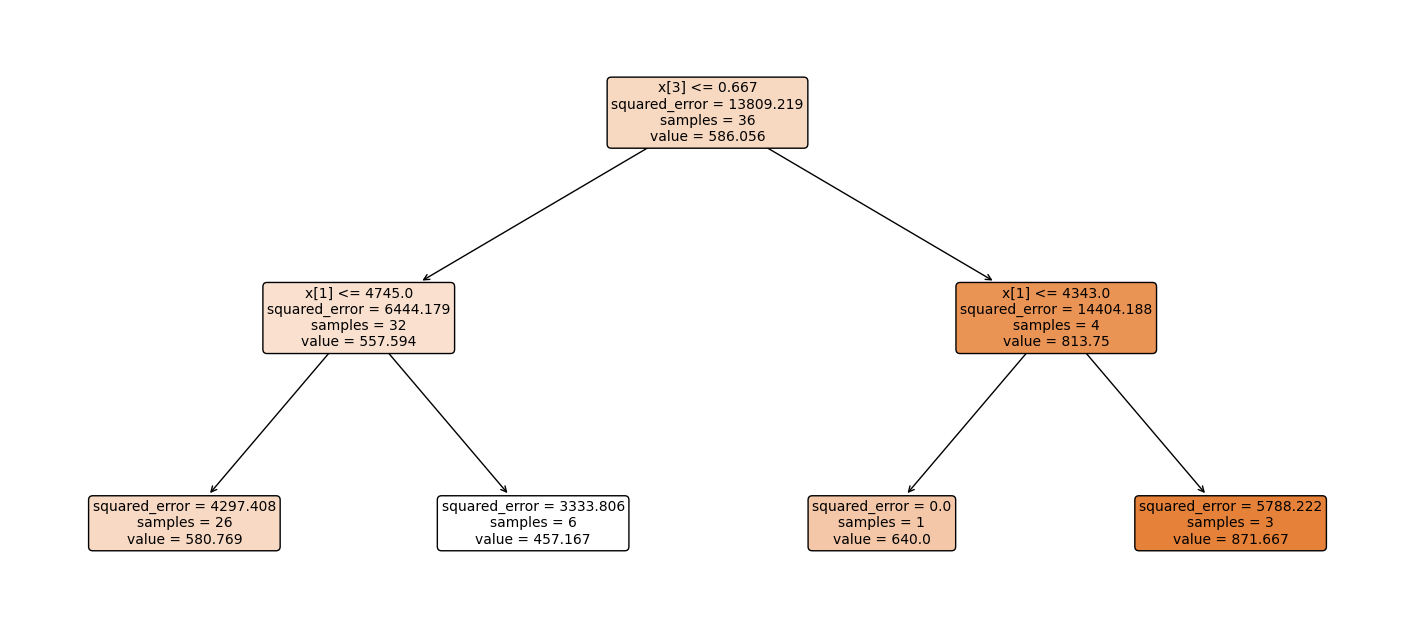

In [94]:
plt.figure(figsize=(18,8))
tree.plot_tree(grid_Decision_tree.best_estimator_,filled=True,rounded=True,fontsize=10)
plt.show()

In [95]:
pred = grid_Decision_tree.predict(x_test)

In [96]:
r_score = r2_score(y_test,pred)
r_score

0.02460381019236768

In [97]:
r2_score(y_test,DecisionTreeRegressor(**grid_Decision_tree.best_params_).fit(x_train,y_train).predict(x_test))

0.02460381019236768